In [1]:
pip install plotly tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Folder path where CSV files are located
folder_path = 'Finance/US_Market/extended_stocks'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

# Loop through the list of CSV files and read each into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Extract company name from the file name (assuming file names are in the format 'company_name.csv')
    company_name = file.split(".csv")[0]
    
    # Add a new column 'Company' to identify the stock data
    df['Company'] = company_name
    
    dfs.append(df)

# Concatenate all DataFrames into one DataFrame
stock_data = pd.concat(dfs, ignore_index=True)

# Check for missing values in each column
missing_values = stock_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Dropping rows where any of the specified columns have NaN values
cleaned_data = stock_data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
print(cleaned_data.isnull().sum())

# Feature Engineering: Add technical indicators
stock_data['MA7'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=7).mean())
stock_data['MA21'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=21).mean())

# Drop rows with missing values resulting from feature engineering
stock_data.dropna(inplace=True)

# Price Returns
stock_data['Return'] = stock_data.groupby('Company')['Close'].pct_change()


# Moving Averages
# 7-day Moving Average
stock_data['MA7'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=7).mean())
# 21-day Moving Average
stock_data['MA21'] = stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=21).mean())

# Volatility
stock_data['Volatility'] = stock_data.groupby('Company')['Return'].transform(lambda x: x.rolling(window=7).std())


#Lag Features 
# Create lag features for 'Close' price
stock_data['Close_Lag1'] = stock_data.groupby('Company')['Close'].shift(1)
stock_data['Close_Lag2'] = stock_data.groupby('Company')['Close'].shift(2)


print(stock_data.head())

# Drop rows with missing values resulting from feature engineering
stock_data.dropna(inplace=True)

print(stock_data.head())



Missing values in each column:
 Date             0
Open         57511
High         57511
Low          57511
Close        57511
Adj Close    57511
Volume       57511
Company          0
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64
          Date       Open       High        Low      Close  Adj Close  \
20  1999-12-17  33.172390  33.708870  32.501789  32.859444  28.115597   
21  1999-12-20  33.082977  33.574749  32.993561  33.530045  28.689373   
22  1999-12-21  33.395924  33.395924  32.904148  33.351215  28.536367   
23  1999-12-22  33.351215  34.021816  33.127682  34.021816  29.110157   
24  1999-12-23  33.977112  35.765381  33.932404  35.586552  30.448992   

       Volume Company  MA7  MA21    Return  Volatility  Close_Lag1  Close_Lag2  
20  3708055.0       A  NaN   NaN       NaN         NaN         NaN         NaN  
21  1196828.0       A  NaN   NaN  0.020408         NaN   32.859444   

2024-12-06 10:38:59.486976: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 10:38:59.488747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 10:38:59.492336: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 10:38:59.501490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733481539.516220      90 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733481539.52

Training data shape: (4971388, 10, 6), Training target shape: (4971388, 1)
Testing data shape: (662924, 10, 6), Testing target shape: (662924, 1)


W0000 00:00:1733481556.144881      90 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/opt/miniconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 344s 9ms/step - loss: 5.5517e-06 - val_loss: 2.9418e-06
Epoch 2/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 326s 8ms/step - loss: 1.1006e-06 - val_loss: 2.7111e-06
Epoch 3/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 321s 8ms/step - loss: 4.0930e-07 - val_loss: 2.4873e-06
Epoch 4/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 325s 8ms/step - loss: 4.3334e-07 - val_loss: 3.1606e-06
Epoch 5/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 322s 8ms/step - loss: 3.6767e-07 - val_loss: 3.1897e-06
Epoch 6/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 322s 8ms/step - loss: 5.3281e-07 - val_loss: 3.6083e-06
Epoch 7/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 325s 8ms/step - loss: 4.3340e-07 - val_loss: 2.1393e-06
Epoch 8/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 322s 8ms/step - loss: 3.0826e-07 - val_loss: 2.6816e-06
Epoch 9/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 322s 8ms/step - loss: 1.6906e-07 - val_loss: 4.3598e-06
Epoch 10/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 321s 8ms/step - loss: 4.5484e-07 - val_loss: 4.1116e-06

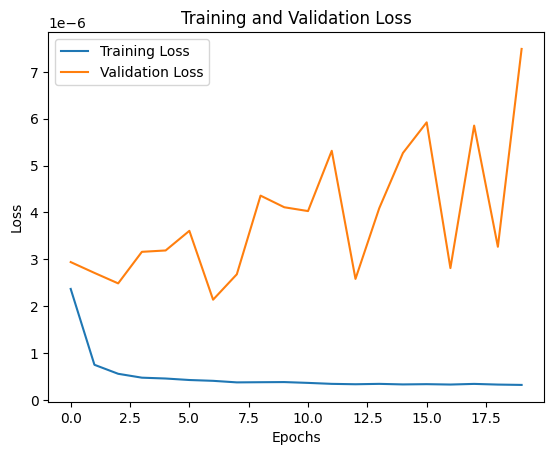

Test Loss: 7.490164534829091e-06
20717/20717 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step
Root Mean Squared Error (RMSE): 1475.63703924128
nDCG@10: 1.0631552380092673


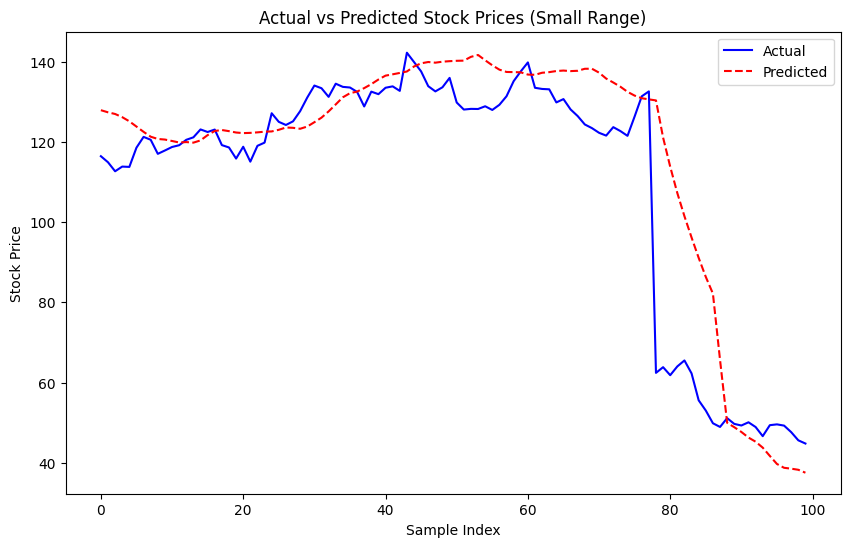

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21']
target = 'Close'

# Cap outliers in 'Return' to a reasonable range
low, high = stock_data['Return'].quantile(0.01), stock_data['Return'].quantile(0.99)
stock_data['Return'] = stock_data['Return'].clip(lower=low, upper=high)

# Split into training and testing sets
train_data = stock_data[(stock_data['Date'] >= '2019-01-01') & (stock_data['Date'] <= '2022-05-31')]
test_data = stock_data[(stock_data['Date'] >= '2022-06-01') & (stock_data['Date'] <= '2023-12-31')]

# Define separate scalers for features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit scalers on training data
X_train_scaled = scaler_X.fit_transform(train_data[features])
y_train_scaled = scaler_y.fit_transform(train_data[[target]])

# Transform test data using the same scalers
X_test_scaled = scaler_X.transform(test_data[features])
y_test_scaled = scaler_y.transform(test_data[[target]])

# Convert to 3D arrays for LSTM
time_steps = 10
X_train_lstm, y_train_lstm = [], []
for i in range(len(X_train_scaled) - time_steps):
    X_train_lstm.append(X_train_scaled[i:i+time_steps])
    y_train_lstm.append(y_train_scaled[i+time_steps])
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

X_test_lstm, y_test_lstm = [], []
for i in range(len(X_test_scaled) - time_steps):
    X_test_lstm.append(X_test_scaled[i:i+time_steps])
    y_test_lstm.append(y_test_scaled[i+time_steps])
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Debugging: Check shapes
print(f"Training data shape: {X_train_lstm.shape}, Training target shape: {y_train_lstm.shape}")
print(f"Testing data shape: {X_test_lstm.shape}, Testing target shape: {y_test_lstm.shape}")

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, X_train_lstm.shape[2])),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=20,
    batch_size=128,
    verbose=1
)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f'Test Loss: {loss}')

# Make predictions using the LSTM model
predictions_scaled = model.predict(X_test_lstm)

# Inverse transform predictions and actual values
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_lstm)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate nDCG@10
def ndcg_at_k(actual, predicted, k=10):
    actual_sorted = sorted(actual, reverse=True)[:k]
    dcg = sum([pred / np.log2(idx + 2) for idx, pred in enumerate(predicted[:k])])
    idcg = sum([rel / np.log2(idx + 2) for idx, rel in enumerate(actual_sorted)])
    return dcg / idcg if idcg > 0 else 0

actual_top_10 = y_test_original[:10].flatten()
predicted_top_10 = predictions[:10].flatten()
ndcg = ndcg_at_k(actual_top_10, predicted_top_10, k=10)
print(f'nDCG@10: {ndcg}')

# Plot predictions vs actuals for a small range
plt.figure(figsize=(10, 6))
plt.plot(range(100), y_test_original[:100], label='Actual', color='blue')
plt.plot(range(100), predictions[:100], label='Predicted', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices (Small Range)')
plt.legend()
plt.show()


Training data shape: (4971388, 10, 10), Training target shape: (4971388, 1)
Testing data shape: (662924, 10, 10), Testing target shape: (662924, 1)


/opt/miniconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 257s 7ms/step - loss: 5.5125e-06 - val_loss: 9.7688e-06
Epoch 2/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 255s 7ms/step - loss: 1.1449e-06 - val_loss: 2.4192e-06
Epoch 3/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 252s 6ms/step - loss: 4.2103e-07 - val_loss: 2.7683e-06
Epoch 4/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 253s 7ms/step - loss: 4.2883e-07 - val_loss: 2.4045e-06
Epoch 5/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 253s 7ms/step - loss: 4.3983e-07 - val_loss: 2.4442e-06
Epoch 6/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 254s 7ms/step - loss: 3.4294e-07 - val_loss: 2.2886e-06
Epoch 7/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 252s 6ms/step - loss: 3.9183e-07 - val_loss: 3.9337e-06
Epoch 8/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 251s 6ms/step - loss: 2.3098e-07 - val_loss: 2.2739e-06
Epoch 9/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 251s 6ms/step - loss: 2.1125e-07 - val_loss: 2.2754e-06
Epoch 10/20
38839/38839 ━━━━━━━━━━━━━━━━━━━━ 255s 7ms/step - loss: 5.7013e-07 - val_loss: 4.0355e-06

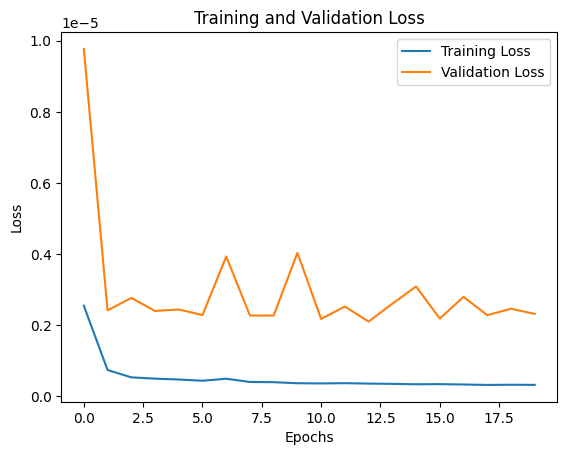

Test Loss: 2.3198390408651903e-06
20717/20717 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
Root Mean Squared Error (RMSE): 821.225934402924
nDCG@10: 1.0537958505446317


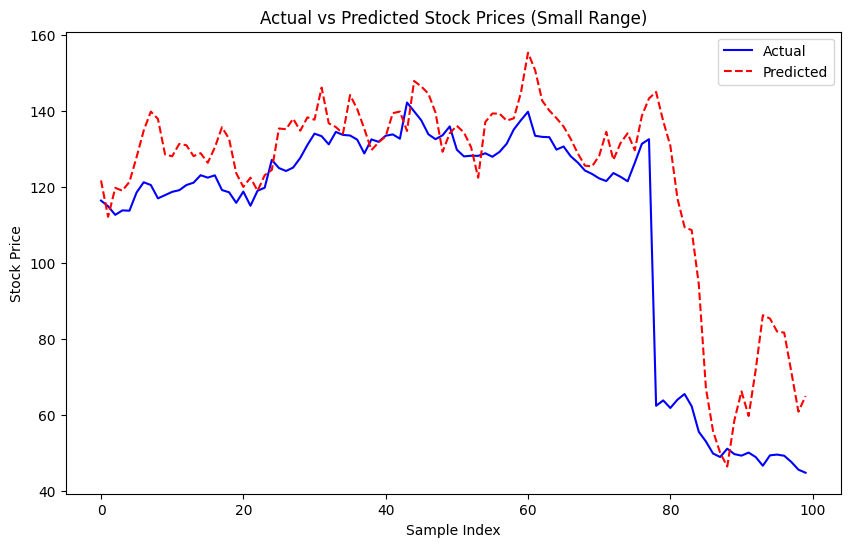

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21', 'Return', 'Volatility', 'Close_Lag1', 'Close_Lag2']
target = 'Close'

# Cap outliers in 'Return' to a reasonable range
low, high = stock_data['Return'].quantile(0.01), stock_data['Return'].quantile(0.99)
stock_data['Return'] = stock_data['Return'].clip(lower=low, upper=high)

# Split into training and testing sets
train_data = stock_data[(stock_data['Date'] >= '2019-01-01') & (stock_data['Date'] <= '2022-05-31')]
test_data = stock_data[(stock_data['Date'] >= '2022-06-01') & (stock_data['Date'] <= '2023-12-31')]

# Select features for prediction
features = ['Open', 'High', 'Low', 'Volume', 'MA7', 'MA21','Volatility', 'Close_Lag1', 'Close_Lag2', 'Return']
target = 'Close'

# Define separate scalers for features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit scalers on training data
X_train_scaled = scaler_X.fit_transform(train_data[features])
y_train_scaled = scaler_y.fit_transform(train_data[[target]])

# Transform test data using the same scalers
X_test_scaled = scaler_X.transform(test_data[features])
y_test_scaled = scaler_y.transform(test_data[[target]])

# Convert to 3D arrays for LSTM
time_steps = 10
X_train_lstm, y_train_lstm = [], []
for i in range(len(X_train_scaled) - time_steps):
    X_train_lstm.append(X_train_scaled[i:i+time_steps])
    y_train_lstm.append(y_train_scaled[i+time_steps])
X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

X_test_lstm, y_test_lstm = [], []
for i in range(len(X_test_scaled) - time_steps):
    X_test_lstm.append(X_test_scaled[i:i+time_steps])
    y_test_lstm.append(y_test_scaled[i+time_steps])
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Debugging: Check shapes
print(f"Training data shape: {X_train_lstm.shape}, Training target shape: {y_train_lstm.shape}")
print(f"Testing data shape: {X_test_lstm.shape}, Testing target shape: {y_test_lstm.shape}")

# Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, X_train_lstm.shape[2])),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_test_lstm, y_test_lstm),
    epochs=20,
    batch_size=128,
    verbose=1
)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss = model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f'Test Loss: {loss}')

# Make predictions using the LSTM model
predictions_scaled = model.predict(X_test_lstm)

# Inverse transform predictions and actual values
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_lstm)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate nDCG@10
def ndcg_at_k(actual, predicted, k=10):
    actual_sorted = sorted(actual, reverse=True)[:k]
    dcg = sum([pred / np.log2(idx + 2) for idx, pred in enumerate(predicted[:k])])
    idcg = sum([rel / np.log2(idx + 2) for idx, rel in enumerate(actual_sorted)])
    return dcg / idcg if idcg > 0 else 0

actual_top_10 = y_test_original[:10].flatten()
predicted_top_10 = predictions[:10].flatten()
ndcg = ndcg_at_k(actual_top_10, predicted_top_10, k=10)
print(f'nDCG@10: {ndcg}')

# Plot predictions vs actuals for a small range
plt.figure(figsize=(10, 6))
plt.plot(range(100), y_test_original[:100], label='Actual', color='blue')
plt.plot(range(100), predictions[:100], label='Predicted', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices (Small Range)')
plt.legend()
plt.show()
